# <b>KDD WeFive_HighFive (Group 1)

<b>Group 1:
<p>Akhil Chundarthil (801137901)
<p>Akhila Vemana (801149644)
<p>Keerthi Reddy Kandi (801149971)
<p>Akshara Gone (801136090)
<p>Koushik Koritala (801135486)

# Github Link : https://github.com/kddprojectgroup1/kdd-project-group_1/blob/master/Project_Notebook_Group1.ipynb

# Project Title: Mining and Modeling NYC Airbnb Data.

The project focuses on analyzing NYC Airbnb to predict the ratings of Airbnb based on their location, price range, guests experience (reviews) and other related features. As Airbnb moves towards becoming an end-to-end travel platform, it is increasingly important for us to deliver travel insights that help people in making decisions about their trips. To scale our ability to answer queries, we needed a systematic approach for serving high-quality information about entities (e.g. ratings, cities, landmarks, events, etc.) and the relationships between them (e.g. the most popular landmark in a city for a reasonable price, the best neighbourhood to stay, etc.)
<br> Our project will accomplish this, following the CRISP-DM process in each phase. We finally achieve useful insights from the observations done in this project.

# Dataset

Dataset Link: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels 

The dataset has the following attributes :

* id
* name
* host_id
* host_name
* neighbourhood_group
* neighbourhood
* latitude
* longitude
* room_type
* price
* minimum_nights
* number_of_reviews
* last_review
* reviews_per_month
* calculated_host_listings_count
* availability_365
* RATINGS ( 1-5 : 1- Lowest, 5- Highest ).This column is not included in dataset, this target variable is added during the data preparation phase.


# Data Preprocessing and Data Preparation

## Importing Libraries

First step before we proceed to our analysis is importing the necessary libraries. 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
from apyori import apriori
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

Next, we import the dataset of new york city Air BnB by using pandas "read_csv" function and storing in variable 'ds'.

In [42]:
ds=pd.read_csv("AB_NYC_2019.csv")
s=ds

## Checking Data Types

Checking the data types of the columns present in dataset. This data type object (dtype) informs us about the layout of the array. Type of the data may be integer, float, Python object etc.

In [43]:
ds.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Summary of Data set

Checking the data types of the columns present in dataset. Info generally prints a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [44]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

## Dimensionality

Shape returns a tuple representing the dimensionality of the DataFrame.It Finds the  number of rows and columns of dataset.

In [45]:
ds.shape

(48895, 16)

## Null Values

Null values affects the observations made by being biased. It is important to check if the dataset has null values and performing the data cleaning to handle such null values. isnull is used here to check null values in all columns of data set. 

In [46]:
ds.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Removing irrelavant features

We drop the columns 'id', 'last_review' as they are not significant for our future data exploration and predictions. Drop function specified labels from rows or columns

In [47]:
ds.drop(['id','last_review'], axis=1, inplace=True)

We drop 'availability_365' rows with value "0" as it indicates that AirBnB is not open on any day in a year which cannot be the case because based on our domain knowledge an AirBnB will be open for atleast one day.

In [48]:
ds.drop(ds[ds['availability_365']==0].index,inplace=True)

## Handling Missing Values

Filling the 'reviews_per_month' column missing values with "0" because we cannot predict the count of reviews made by guest as it varies time to time. And filling with '0' is considerable as it is more realistic than filling with random values or other methods like mode, median, mean.

In [49]:
ds.fillna({'reviews_per_month':0}, inplace=True)

## Feature Scaling

We are feature scaling the 'reviews_per_month' column values by converting it to integer and multiplying the column values with 30 and then rounded it to nearest integer as the values prior were of type float which generally is not the case because reviews by guests will be positive integers.

In [50]:
ds['reviews_per_month']=ds['reviews_per_month']*30

In [51]:
round(ds['reviews_per_month']).head(5)

0      6.0
1     11.0
2      0.0
3    139.0
5     18.0
Name: reviews_per_month, dtype: float64

## Converting Data Types

From the output of "info" function, we saw that some of the columns in our dataset seems to be misleading in a wrong way. So, changing data types of those columns from object type to relevant types.

In [52]:
ds['neighbourhood']=ds['neighbourhood'].astype('category')
ds['neighbourhood_group']=ds['neighbourhood_group'].astype('category')
ds['room_type']=ds['room_type'].astype('category')
ds['reviews_per_month']=ds['reviews_per_month'].astype('int')

## Dataset Description

Finding the structure of dataset. Describe function prints the structure of only numeric columns in the dataset by excluding the other different types of columns.

In [53]:
ds.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.136200e+04,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000
mean,8.144950e+07,40.728401,-73.948745,162.050475,8.338658,31.852369,44.928544,10.334067,175.831994
std,8.673088e+07,0.056561,0.051397,254.425463,23.836703,51.636804,53.385321,40.700398,126.187636
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,8.620116e+06,40.688383,-73.983270,70.000000,2.000000,2.000000,5.000000,1.000000,55.000000
50%,4.109561e+07,40.723720,-73.954110,111.500000,3.000000,10.000000,27.000000,1.000000,168.000000
75%,1.452145e+08,40.763030,-73.930132,189.000000,5.000000,39.000000,70.000000,3.000000,305.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,1755.000000,327.000000,365.000000


## Handling Outliers

Removing the Outliers after finding the five point summary of the respective attributes. After performing the five point summary, we got the range of outliers and dropped them by using "drop" function.

In [54]:
ds= ds.drop(ds[(ds['minimum_nights']>365)].index)
ds= ds.drop(ds[(ds['number_of_reviews']>500)].index)
ds= ds.drop(ds[(ds['calculated_host_listings_count']>100)].index)
ds= ds.drop(ds[(ds['price']>1800)].index)
ds= ds.drop(ds[(ds['price']<1)].index)
ds= ds.drop(ds[(ds['reviews_per_month']>168)].index)

In [55]:
ds.dtypes

name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
reviews_per_month                    int32
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

<b>As exploration of data is done till now, we now derived new "rating" column based on neighbourhood_group(location), price range and their availability in a year from the available columns in dataset. We categorized Brooklyn and Manhattan to one category and Queens,Staten Island, Bronx to other category for deriving the rating of available AirBnBs in these neighbourhood_groups because, the locations are near Manhattan and Brooklyn are costly areas in New York City, and the ratings of Airbnb varies compared to other locations which are rural like Bronx. So, AirBnBs in Bronx area should have low price range but with better facilities.

In [56]:
ds['rating']=1
for i in range(len(ds)):
    if((str(ds.iloc[i,3]) in ['Manhattan','Brooklyn'])):
        if((ds.iloc[i,8]<100) and (ds.iloc[i,13]>200)):
            ds.iloc[i,14]=5
        elif((ds.iloc[i,8]<500) and (ds.iloc[i,13]>100)):
            ds.iloc[i,14]=4
        elif(ds.iloc[i,8] in range(500,1000) and (ds.iloc[i,13]in range(30,250))):
            ds.iloc[i,14]=3
        elif((ds.iloc[i,8] in range(1000,3000)) and (ds.iloc[i,13] in range(10,150))):
            ds.iloc[i,14]=2
    elif((str(ds.iloc[i,3]) in ['Queens','Staten Island','Bronx'])):
        if((ds.iloc[i,8] in range(850,2000)) and (ds.iloc[i,13] < 150)):
            ds.iloc[i,14]=2
        elif((ds.iloc[i,8] in range(500,850)) and (ds.iloc[i,13] < 250)) :
            ds.iloc[i,14]=3
        elif((ds.iloc[i,8] in range(150,500)) and (ds.iloc[i,13] < 300)) :
            ds.iloc[i,14]= 4
        elif((ds.iloc[i,8]<150) and (ds.iloc[i,13] in range(200,365))):
            ds.iloc[i,14]=5

# Data Visualization

<b>Plotting the most repeated words in name column as an image using WordCloud and STOPWORDS packages in python.
Installed the packages 'conda install -c conda-forge wordcloud and conda install stop-words'

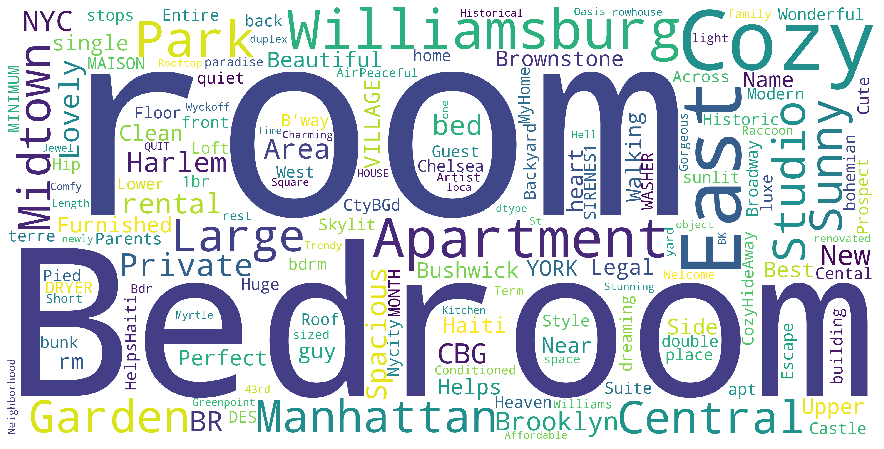

In [57]:
name_corpus = ''.join(str(ds['name']))
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

## Observation

The output above shows the most frequent number of words in listings "name" column which are including: Bedroom, room, cozy, Midtown, williamsburg etc. There are some words which specifically tell about AirBnb desription like: Large, East, Private, cozy, living room, sunny, etc . These are typical words for hosts when describing their listings.

<b>Marking the scatter plot for the neighborhood groups in New York City.

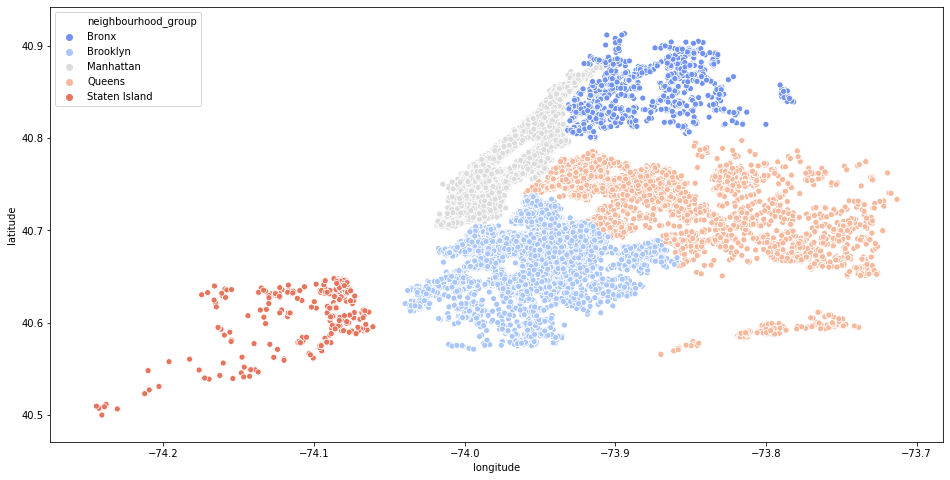

In [58]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=ds.latitude,x=ds.longitude,hue=ds.neighbourhood_group,palette="coolwarm")
plt.show()

## Observation

The output above shows the 5 regions in New York city map and the spread of AirBnb's in those locations.

<b>Count plot for neighbourhood_group. 

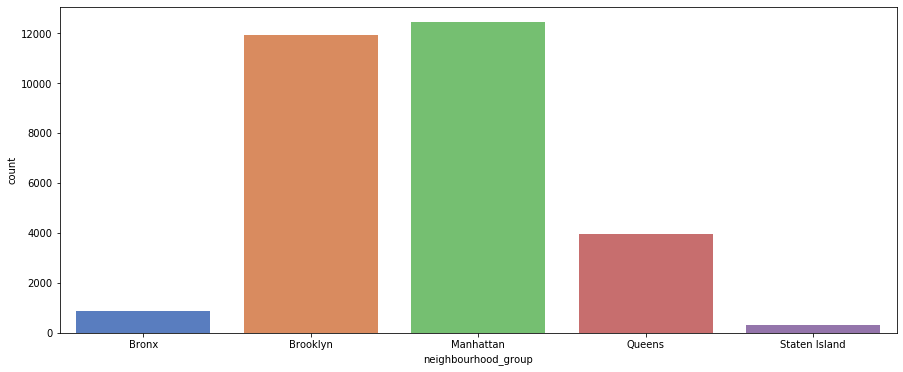

In [59]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(ds.neighbourhood_group,palette="muted")
plt.show()

## Observation

From the output above we can observe that Brooklyn and Manhattan have comparitively more number of AirBnB's in New York City and are quite popular .

<b>Visualizing pie plot to find the percentange of different types of rooms available in AirBnB's.

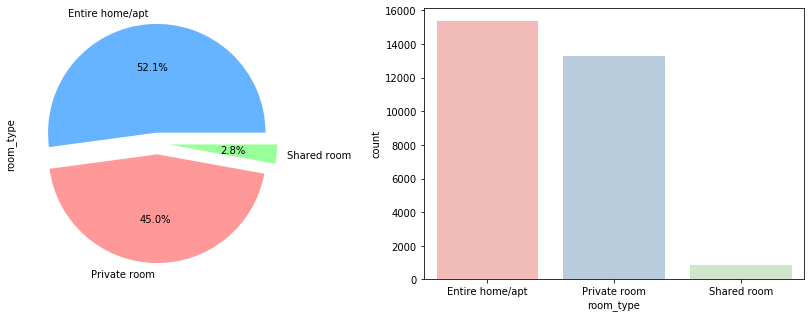

In [60]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ds.room_type.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],colors = ['#66b3ff','#ff9999','#99ff99'])
ax = sns.countplot(ds.room_type,palette="Pastel1")
plt.show()

## Observation

From the above output we can observe that the 'Entire home/apt' type are more in number which means guest prefer to have it entirely for themselves for their trips to feel like a home and can live like a family together.

<b>Bar plot representing the price for each neighbourhood_group

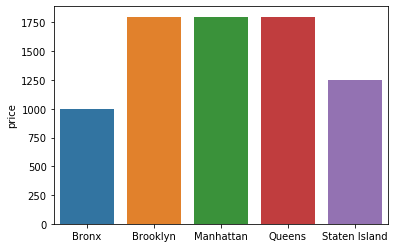

In [61]:
sns.barplot(ds["neighbourhood_group"].cat.categories, ds.groupby('neighbourhood_group')['price'].max())

## Observation 

From the above output we can observe that the prices for groups Brooklyn,Manhattan and Queens are higher compared to other 2 groups( Bronx, Staten Island).

<b>Violin plot to find the rating for each neighbourhood_group. 

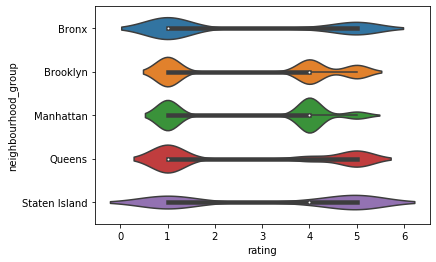

In [62]:
ax = sns.violinplot(x="rating", y="neighbourhood_group", data=ds)

## Observation 

Rating column derived from features - price,availability_365 and neighbourhood_group. We can observe  that the rating for Brooklyn and Manhattan has atleast rating 1 when compared to other groups.

# Data Modelling

# 1. Association Rules


Association rule mining is a technique to identify underlying relations between different features. It is intended to identify strong rules discovered in datasets using some measures of interestingness.

### Discretization:

Before we perform apriori algorithm (To get Association rules for our dataset) we first discretized the numerical columns "price" and "availability_365" into 5 categories by "Binning" because without discretization the rules in the output contains numerical values which couldn't be distinguished.

To bin we first check for the minimum and maximum values in "price" and "availability_365".

In [63]:
ds_a=ds.copy()
print(ds_a['price'].max())
print(ds_a['price'].min())
print(ds_a['availability_365'].max())
print(ds_a['availability_365'].min())

1800
10
365
1


We have choosen bin ranges depending on the values in those columns and further those bins are matched to their respective categories accordingly.

In [64]:
price_bins = [0,50,100,300,350,1800]
price_categories = ['very low price','low price','medium range price','high price','very high price']
ds_a['price'] = pd.cut(ds_a['price'], price_bins, labels = price_categories)

In [65]:
av365_bins = [1,50,100,150,200,365]
av365_categories = ['very low availability','low availabilty','medium range availability','high availability','very high availability']
ds_a['availability_365'] = pd.cut(ds_a['availability_365'], av365_bins, labels = av365_categories)

We used apriori algorithm from "apyori" class to get association rules in the dataset.
Apriori Algorithm is a Machine Learning algorithm which is used to gain insight into the structured relationships between different features involved. 
<br> For generating the rules we used min_support, min_confidence, min_lift and min_length as parameters and have choosen their values accordingly.
<br>There are three major components of Apriori algorithm:
<br>Support
<br>Confidence
<br>Lift
<br>So, for the dataset we get rules and their respective support, confidence, lift values.

In [66]:
from apyori import apriori
ds_ab=ds_a[['neighbourhood_group','price','availability_365','room_type']]
records = []
for i in range(0,29545):
    records.append([str(ds_ab.values[i,j]) for j in range(0, 4)])

In [67]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.1, min_lift=3, min_length=2)

In [68]:
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: very low price -> Shared room
Support: 0.017464884075139617
Confidence: 0.6150178784266984
Lift: 4.905697413098489
Rule: Bronx -> very low price
Support: 0.008563208664748688
Confidence: 0.4764595103578154
Lift: 3.800484944255307
Rule: very low price -> Shared room
Support: 0.008698595363005584
Confidence: 0.3063170441001192
Lift: 4.8735256154755096
Rule: very high availability -> very low price
Support: 0.010560162464037908
Confidence: 0.3718712753277712
Lift: 6.853984297915783
Rule: very high availability -> very low price
Support: 0.0056523946522254185
Confidence: 0.19904648390941596
Lift: 7.351035458879618
Rule: very low price -> Private room
Support: 0.004603147740734473
Confidence: 0.39882697947214074
Lift: 3.1812481394450316


## Observation

From the above generated rules we can observe that
<br> 1. Bronx has more number of "Private" and "Shared" rooms for very low price.
<br> 2. Brooklyn has more number of "Shared" rooms which are available on most number of days for a lower price.

## 2. Ensembling using Random Forest Regressor

Ensemble learning, in general, is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible(less bias) and less data-sensitive (less variance).We can use Random forest Algorithm an ensemble model using bagging as the ensemble method and decision tree as the individual model.A random sample of cases and features are used to build each individual tree, and the combined predictions are averaged to return the final result for the forest.

### One Hot Encoding Categorical features

RandomForestRegressor need all the features in the dataset to be in numerical form. So in order to convert categorical features to numerical form we used One Hot Encoding.

In [69]:
categorical_features = ds.select_dtypes(include=['category'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (29545, 3)


In [70]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.reset_index(drop=True, inplace=True)

## Normalization of numerical features using Standard Scaler

We performed normalization to change the values of numeric columns in the dataset to a common scale, without distorting differences in the range of values. We used StandardScaler() for normalization.

In [71]:
numerical_features =  ds.select_dtypes(exclude=['object','category'])
sc = StandardScaler()
y = ds[['price']].values
y= sc.fit_transform(y)
numerical_features = numerical_features.drop(['price'], axis=1)
numerical_features = pd.DataFrame(sc.fit_transform(numerical_features), columns = numerical_features.columns)

Atlast we concatenated both the categorical and numerical features. Here we used "Price" target variable (y) and all other features as predictor variables (X).

In [72]:
X = np.concatenate((categorical_features_one_hot,numerical_features),axis=1)
ds_concat = pd.concat([categorical_features_one_hot,numerical_features],axis=1)

We performed train-test split on X, y in a ratio of 80:20. 

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We used RandomForestRegressor() as ensembling method. 
<br>A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

<br> First we performed RandomForestRegressor algorithm, but we got a R2 score of 0.45 so inorder to improve accuracy of the model we used GridSearchCV.
<br>It is an exhaustive search method over specified parameter values for an estimator. GridSearchCV implements a “fit” and a “score” method. 

In [74]:
tuned_parameters = {'n_estimators': [12, 300, 500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3]}
RF_gs = GridSearchCV(RandomForestRegressor(),param_grid=tuned_parameters, cv = 5)

We used R2 score as the evaluation metrics for the model.

In [75]:
RF_gs.fit(X_train, y_train)
r2_score(y_test, RF_gs.predict(X_test), multioutput='variance_weighted')

0.712670601851151

## Observation

We acheived an R2 score of 0.71 from which we can infer that the model is accurate.

# 3. Pipelining: Feature scaling and modelling

In Python scikit-learn, Pipelines help to to clearly define and automate these workflows.
We used pipeling for data preparation, feature extraction and modelling.
we used pipelining to prevent this data leakage. We used FeatureUnion in pipeline which allows the results
of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can 
be trained.

<br> For feature scaling we used principle component analysis(PCA) and SelectKBest for selecting the best features in the datset.
<br> For modelling, we used "RandomForestRegressor" with "GridSearchCV". These two are given as input for pipelining.
<br>For evaluation, "cross_val_score" is used.

In [76]:
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
estimators = []
estimators.append(('feature_union',feature_union))
estimators.append(('rfr',RandomForestRegressor()))
model = Pipeline(estimators)
seed = 7
kfold = KFold(n_splits=15, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.32142311588573064


## Observation 
<br>We got a cross_val_score of 0.33. This score is obtained because of the combination of PCA(Principal Component Analysis), Selectkbest and RandomForestRegressor() in the pipeline.

# Bias: 
The common definition of data bias is that the available data is not representative of the population or phenomenon of study. Data bias occurs due to structural characteristics of the systems that produce the data. The huge success of applications of machine learning (ML) applications in the past decade — in image recognition, recommendation systems, e-commerce and online advertising — has inspired its adoption in domains such as social justice, employment screening, smart interactive interfaces such as Siri, Alexa, and the like. Along with the proliferation of these applications, there has been an alarming rise in reports of gender, race and other types of bias in these systems. 

For example: females were associated with professions of nurse and nanny whereas males were associated with professions of doctor and financier.In another case Amazon tried to build an AI tool to screen candidates until management discovered that it had learned to penalize women candidates. The problem is that in most companies today, technical roles are filled by men and this bias creeps into any models that use current employee data to train models. Unless detected societal biases in data can lead to algorithmic that discriminate on gender, race and other categories.

There is no bias in our dataset because of the absence of bias causing columns like gender,race etc. So there is no requirement for bias mitigation in our project.

# Summary

Our dataset is of Airbnb data which is an growing field. Every tourist now-a-days
are likely to prefer Airbnb for their stay rather than hotels. So this is an on going
trend. Our data is unique in terms of helping the users to quickly identify and get
some useful insights about current Airbnb’s located in Newyork.

<p>We cleaned and performed EDA on our dataset before performing modelling.
Some of the original attributes were irrelevant, we performed dimensionality
reduction and handled outliers by removing them, incase of missing values we
used data imputation method of filling with relevant value, we did perform
feature scaling for necessary attributes(reviews), handled some of original
attributes which were of wrong data type by converting it to relevant data type.

<p>There was no imbalance of data in our dataset, so we didn&#39;t perform related
techniques to handle such imbalance. We created a new important feature
“rating” by which customers get to know more about Airbnb. Based on others
features like which neighbourhood the Airbnb is located, their price range, and
their availability in a year.

<p>Association rules, Ensembling technique, Pipelining(PCA , selectkbest,
randomforest) modelling techniques are used to build our model. R2 score is used
for ensembling, cross validation score is used for pipelining to evaluate our
model.
    
<p>During the modelling phase, when we initially tried to do Random forest
modelling we got a score of 0.45, to overcome this problem we performed
“Gridsearchcv” on the random forest regressor model. This enhanced the score to
0.71 which is optimal score and tells that our model is accurate.

<p>Futurework: We have done our project on narrow scope like considered only one
region in US i.e Newyork. This can be extended to perform globally considering all
the regions in US and the different kinds of Airbnb’s.